In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/IMDB-Movie-Data-PreProcessed.csv')

df.dropna(inplace=True)

df.head()

,Unnamed: 0,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,0,Guardians of the Galaxy,0.574499,A group of intergalactic criminals are forced ...,0.758454,0.763594,0.8,0.440,0.873239,0.422474,0.355669,0.730337
1,1,Prometheus,0.659804,"Following clues to the origin of mankind, a te...",0.717391,0.689626,0.6,0.464,0.718310,0.271093,0.135016,0.606742
2,2,Split,0.236589,Three girls are kidnapped by a man with a diag...,0.526570,0.750569,1.0,0.408,0.760563,0.087923,0.147465,0.573034
3,3,Sing,0.747786,"In a city of humanoid animals, a hustling thea...",0.768116,0.722732,1.0,0.336,0.746479,0.033755,0.288609,0.539326
4,4,Suicide Squad,0.521815,A secret government agency recruits some of th...,0.763285,0.728678,1.0,0.456,0.605634,0.219697,0.347010,0.325843


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
L=set([])
considered=['NN','NNS','NNP','NNPS','JJ','JJR','JJS','VB','VBN','VBD','VBG','VBP','VBZ']

for i in df['Description']:
  tokens=nltk.word_tokenize(i)
  for (j,k) in nltk.pos_tag(tokens):
    if(k in considered):
      L.add(j)

In [ ]:
D={}
for i in L:
  D[i]=0

In [ ]:
for i in df['Description']:
  tokens=nltk.word_tokenize(i)
  for (j,k) in nltk.pos_tag(tokens):
    if(k in considered):
      D[j]=D[j]+1

In [ ]:
Input=[]

for i in L:
  if(D[i]>10):
    Input.append(i)

In [ ]:
print(len(L))

5361


In [ ]:
print(len(Input))

155


In [ ]:
print(df.shape)

(838, 12)


In [ ]:
df_new=pd.DataFrame()
df_new['Rating']=df['Rating']

for i in L:
  df_new[i]=[0]*df.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
df_new.head()

,Rating,vintage,national,visited,Customs,temptations,investigators,toys,part-man,kindness,...,Korea,realizes,smart,taught,race-car,lethal,High,Bobby,»,Alan
0,0.873239,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.718310,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.760563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.746479,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.605634,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ind=-1

for i in df['Description']:
  ind=ind+1
  tokens=nltk.word_tokenize(i)
  for (j,k) in nltk.pos_tag(tokens):
    if(k in considered):
      df_new[j][ind]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_new.head()

,Rating,vintage,national,visited,Customs,temptations,investigators,toys,part-man,kindness,...,Korea,realizes,smart,taught,race-car,lethal,High,Bobby,»,Alan
0,0.873239,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.718310,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.760563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.746479,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.605634,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Input.append('Rating')
df_new=df_new[Input]

In [ ]:
df_new.to_csv('/content/drive/MyDrive/IMDB-Movie-Data-PreProcessed-Summary.csv')

In [ ]:
import pandas as pd
df_new=pd.read_csv('/content/drive/MyDrive/IMDB-Movie-Data-PreProcessed-Summary.csv')

In [ ]:
print(len(df_new.columns))

157


In [ ]:
X=df_new[list(set(df_new.columns).difference(set(['Rating','Unnamed: 0'])))]
Y=df_new['Rating']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.05,random_state=0)

In [ ]:
regrl1 = linear_model.Lasso(alpha=0.1)
regrl2 = linear_model.Ridge(alpha=0.5)

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

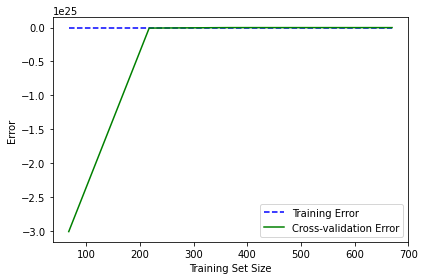

In [ ]:
regr=LinearRegression()

sizes, training_scores, testing_scores = learning_curve(regr, X, Y, scoring='r2')

mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

plt.plot(sizes, mean_training, '--', color="b",  label="Training Error")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation Error")

plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

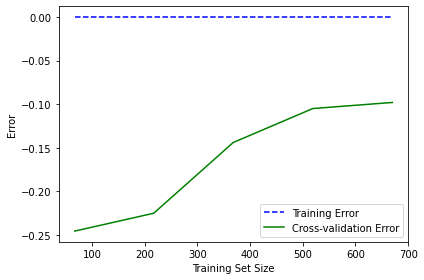

In [ ]:
from sklearn import linear_model
regrl1 = linear_model.Lasso(alpha=0.1)

sizes, training_scores, testing_scores = learning_curve(regrl1, X, Y, scoring='r2')

mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

plt.plot(sizes, mean_training, '--', color="b",  label="Training Error")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation Error")

plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

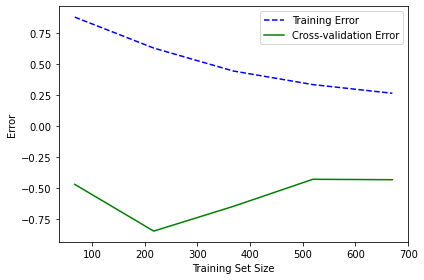

In [ ]:
from sklearn import linear_model
regrl2 = linear_model.Ridge(alpha=0.5)

sizes, training_scores, testing_scores = learning_curve(regrl2, X, Y, scoring='r2')

mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

plt.plot(sizes, mean_training, '--', color="b",  label="Training Error")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation Error")

plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
import pickle

pickle.dump(regrl2, open('/content/drive/MyDrive/Desc_LR.sav', 'wb'))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 10ms/step - loss: 0.1475 - val_loss: 0.0718
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.0377
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0342 - val_loss: 0.0287
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.0266
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0236 - val_loss: 0.0253
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0212 - val_loss: 0.0244
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0194 - val_loss: 0.0241
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0236
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.0230
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.0226
Epoch 11/100
25/25 [

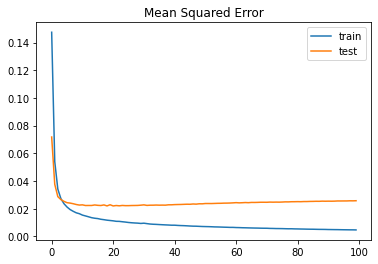

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=50,activation="relu"))
ann.add(tf.keras.layers.Dense(units=50,activation="relu"))
ann.add(tf.keras.layers.Dense(units=50,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="linear"))
ann.compile(optimizer=tf.keras.optimizers.SGD(lr=0.003, momentum=0.9),loss="mean_squared_error")
history=ann.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs = 100)

plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 7ms/step - loss: 0.7631 - val_loss: 0.2271
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1152 - val_loss: 0.1011
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0814
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0376 - val_loss: 0.0701
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.0613
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.0563
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.0540
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.0488
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0481
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0196 - val_loss: 0.0448
Epoch 11/100
25/25 [=

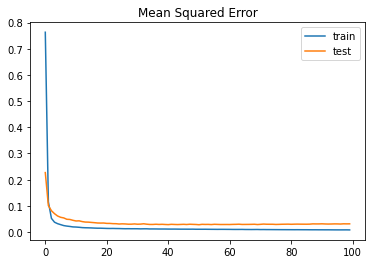

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=50,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="linear"))
ann.compile(optimizer=tf.keras.optimizers.SGD(lr=0.003, momentum=0.9),loss="mean_squared_error")
history=ann.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs = 100)

plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
pickle.dump(ann, open('/content/drive/MyDrive/Desc_ANN.sav', 'wb'))

INFO:tensorflow:Assets written to: ram://9988dfe9-410e-4f20-824a-1ea4dd65a448/assets


In [ ]:
import math

layer=ann.layers[0]
D={}

for i in range(155):
  avg=0.0
  for j in layer.get_weights()[0][i]:
    avg=avg+abs(j)
  avg=avg/50.0
  D[Input[i]]=avg

for i in range(5):
  max_str=""
  max=0
  for i in Input:
    if i!='Rating' and D[i]>max:
      max=D[i]
      max_str=i
  D[max_str]=0
  print(max_str+": "+str(max))

stop: 0.09740788819253794
people: 0.09664293959736824
mother: 0.09650465038139373
take: 0.09606908296234906
humanity: 0.09597054764279164
